**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

**Exploración y Curación de Datos**

---
## Trabajo práctico entregable - Parte 2

* Adriano Antonello
* Gabriel Delgado
* Pablo Casas


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [2]:
df_melb = pd.read_csv('melb_data.csv')
df_melb[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [3]:
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Separamos las columnas categoricas a las cuales vamos a hacer onehotencoder

In [4]:
categoric_cols = ['Type', 'CouncilArea', 'Suburb', 'Regionname'] 
numeric_cols = ['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Price', 'PrecioPromedioAirbnb', 'Distance', 'Propertycount']

Aplicamos one-hot encoding

In [5]:
df_melb=df_melb.dropna()
encoder = OneHotEncoder(sparse=False)
encoder.fit(df_melb[categoric_cols])

OneHotEncoder(sparse=False)

In [6]:
encoded_types = encoder.transform(df_melb[categoric_cols])
encoded_types[:10]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [7]:
df_encoded = pd.DataFrame(data=encoded_types, columns=encoder.get_feature_names(categoric_cols))

In [8]:
df_encoded.head(2)

,Type_h,Type_t,Type_u,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,...,Suburb_Yarra Glen,Suburb_Yarraville,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_encoded.shape

(6196, 329)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [10]:
numeric_cols =['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Distance', 'Propertycount']

In [11]:
df_melb_numeric= df_melb[numeric_cols]
df_melb_numeric = pd.concat([df_melb_numeric, df_melb[['YearBuilt', 'BuildingArea']]])

In [12]:
scaler = preprocessing.StandardScaler().fit(df_melb_numeric[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Distance', 'Propertycount','YearBuilt','BuildingArea']])
df_melb_numeric_scaled = scaler.transform(df_melb_numeric[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Distance', 'Propertycount','YearBuilt','BuildingArea']])

In [13]:
df_melb_numeric_scaled = pd.DataFrame(df_melb_numeric_scaled, columns=['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Distance', 'Propertycount','YearBuilt','BuildingArea'])

In [14]:
df_melb_numeric_scaled.head()

,Rooms,Bedroom2,Bathroom,Car,Distance,Propertycount,YearBuilt,BuildingArea
0,-0.959224,-0.929954,-0.810257,-1.692272,-1.292159,-0.787691,NaN,NaN
1,0.070641,0.100999,0.595611,-1.692272,-1.292159,-0.787691,NaN,NaN
2,1.100507,0.100999,-0.810257,0.458562,-1.292159,-0.787691,NaN,NaN
3,0.070641,1.131952,0.595611,-1.692272,-1.292159,-0.787691,NaN,NaN
4,-0.959224,-0.929954,-0.810257,0.458562,-1.292159,-0.787691,NaN,NaN


In [15]:
df_melb_numeric_scaled.isna().sum()

Rooms            6196
Bedroom2         6196
Bathroom         6196
Car              6196
Distance         6196
Propertycount    6196
YearBuilt        6196
BuildingArea     6196
dtype: int64

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df_melb_numeric_scaled.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

C:\Users\gabyd\anaconda3\envs\Diplo\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [17]:
melb_data_mice

,Rooms,Bedroom2,Bathroom,Car,Distance,Propertycount,YearBuilt,BuildingArea
0,-0.959224,-0.929954,-0.810257,-1.692272,-1.292159,-0.787691,-0.306593,-0.488494
1,0.070641,0.100999,0.595611,-1.692272,-1.292159,-0.787691,-0.306593,-0.488494
2,1.100507,0.100999,-0.810257,0.458562,-1.292159,-0.787691,-0.306593,-0.488494
3,0.070641,1.131952,0.595611,-1.692272,-1.292159,-0.787691,-0.306593,-0.488494
4,-0.959224,-0.929954,-0.810257,0.458562,-1.292159,-0.787691,-0.306593,-0.488494
...,...,...,...,...,...,...,...,...
12387,NaN,NaN,NaN,NaN,NaN,NaN,0.837686,0.081818
12388,NaN,NaN,NaN,NaN,NaN,NaN,-1.944277,-0.292518
12389,NaN,NaN,NaN,NaN,NaN,NaN,0.076583,-1.166262
12390,NaN,NaN,NaN,NaN,NaN,NaN,1.257605,-0.880445


In [18]:
melb_year_build_orig = df_melb.YearBuilt.dropna().to_frame()
melb_year_build_orig['No Imputation'] = 'Original'

In [19]:
melb_build_area_orig = df_melb.BuildingArea.dropna().to_frame()
melb_build_area_orig['No Imputation'] = 'Original'

In [20]:
mice_build_area_esc = melb_data_mice.BuildingArea.to_frame()
mice_build_area_esc['Imputation'] = 'KNN over BuildingArea'

In [21]:
mice_year_built_esc = melb_data_mice.YearBuilt.to_frame()
mice_year_built_esc['Imputation'] = 'KNN over YearBuilt'

<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

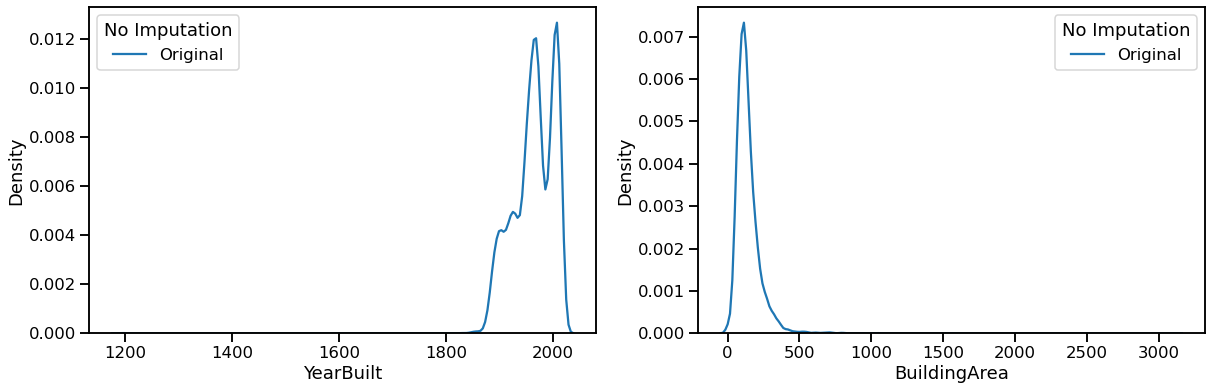

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.kdeplot(data=melb_year_build_orig, x='YearBuilt', hue='No Imputation', ax=ax[0], )
sns.kdeplot(data=melb_build_area_orig, x='BuildingArea', hue='No Imputation', ax=ax[1])

<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

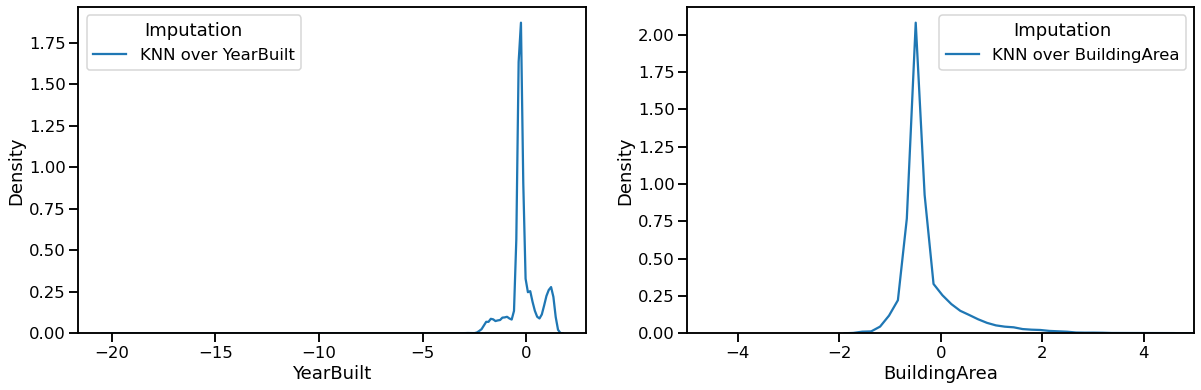

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
plt.xlim(-5, 5)
sns.kdeplot(data=mice_year_built_esc, x='YearBuilt', hue='Imputation', ax=ax[0])
sns.kdeplot(data=mice_build_area_esc, x='BuildingArea', hue='Imputation', ax=ax[1])

In [24]:
melb_data_mice.isna().sum()

Rooms            6196
Bedroom2         6196
Bathroom         6196
Car              6196
Distance         6196
Propertycount    6196
YearBuilt           0
BuildingArea        0
dtype: int64

In [25]:
melb_df_final = pd.concat([df_encoded,melb_data_mice], axis=1)
melb_df_final = melb_df_final.dropna()
melb_df_final

,Type_h,Type_t,Type_u,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,...,Regionname_Western Metropolitan,Regionname_Western Victoria,Rooms,Bedroom2,Bathroom,Car,Distance,Propertycount,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.959224,-0.929954,-0.810257,-1.692272,-1.292159,-0.787691,-0.306593,-0.488494
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.070641,0.100999,0.595611,-1.692272,-1.292159,-0.787691,-0.306593,-0.488494
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.100507,0.100999,-0.810257,0.458562,-1.292159,-0.787691,-0.306593,-0.488494
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.070641,1.131952,0.595611,-1.692272,-1.292159,-0.787691,-0.306593,-0.488494
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.959224,-0.929954,-0.810257,0.458562,-1.292159,-0.787691,-0.306593,-0.488494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.070641,0.100999,0.595611,-0.616855,4.588503,-1.213988,-0.306593,-0.488494
6192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.070641,0.100999,-0.810257,-1.692272,-0.525891,-0.243349,-0.306593,-0.488494
6193,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.989090,-1.960907,-0.810257,-0.616855,-0.525891,-0.243349,-0.306593,-0.488494
6194,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.959224,-0.929954,-0.810257,-0.616855,-0.917935,-0.704460,-0.306593,-0.488494


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [26]:
from sklearn.decomposition import PCA
pca = PCA().fit_transform(melb_df_final)

In [27]:
pca.shape

(6196, 337)

In [28]:
ex_variance=np.var(pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)

Antes de aplicar PCA es necesario estandarizar siempre ya que el analisis de componentes principales es un método de reduccion de variables que identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos. 

In [29]:
covar_matrix = PCA(n_components = 337)

In [30]:
covar_matrix.fit(melb_df_final)
variance = covar_matrix.explained_variance_ratio_ 

In [31]:
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

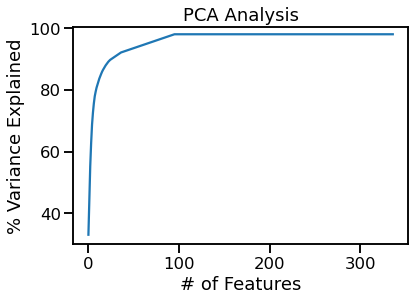

In [32]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

Elegimos las primeras 88 columnas, ya que contienen el 97% de la varianza total, luego alcanza el plateau.

In [33]:
processed_melb_df = pd.DataFrame(data=pca[:,:87])
processed_melb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-2.173470,-0.488494,-1.325264,-0.685873,-0.716720,0.543343,-0.569045,-0.628424,0.079555,-0.037482,...,-0.144829,-0.333448,-0.080097,0.027989,-0.273683,-0.589908,-0.202661,0.053342,-0.043231,0.001294
1,-0.476368,-0.016528,-2.023759,-1.072412,-0.253644,0.795937,-0.564300,-0.395132,0.100034,-0.170260,...,-0.144581,-0.332000,-0.078465,0.026038,-0.274776,-0.590810,-0.203805,0.048269,-0.042770,0.003533
2,0.235708,-0.137798,-1.060597,0.541758,-1.693508,-0.038605,-0.653157,0.108542,0.118207,-0.065890,...,-0.133043,-0.334757,-0.073153,0.034968,-0.261147,-0.599285,-0.200915,0.055858,-0.043766,0.004042
3,0.075275,0.085257,-2.152180,-1.289337,-0.493865,0.628537,-0.581741,-0.130589,0.115262,-0.208808,...,-0.146170,-0.336988,-0.085700,0.030637,-0.273325,-0.587240,-0.208496,0.043555,-0.034887,0.004906
4,-1.416375,-0.440492,-0.661567,1.195207,-0.955015,0.502399,-0.620642,-0.600166,0.107294,-0.024140,...,-0.143726,-0.338103,-0.081286,0.035382,-0.260892,-0.593335,-0.205954,0.049529,-0.037639,0.003143


In [34]:
processed_melb_df.to_csv("melb_pca.csv")

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [35]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(df_melb[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
import numpy
import pandas
X = numpy.hstack([X_cat, df_melb[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (6196, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (6196, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.283769,-0.281861
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.233087,0.622421
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.182406,1.526703
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.233087,0.622421
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.283769,-0.281861


In [36]:
melb_df_final.to_csv("melb_df_final")

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
